In [116]:
import pandas as pd 
import json
import requests 
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

In [72]:

d = pd.DataFrame(dict)

#How many number of pokemon do you want 
y = 150

for x in range(1,y+1):
    id = x
    url = f"https://pokeapi.co/api/v2/pokemon/{id}/"
    r = requests.get(url).json()
    i = r["id"]
    d.loc[x,"id"] = i
    n = r["name"]
    d.loc[x,"name"] = n
    t1 = r["types"][0]["type"]["name"]
    d.loc[x,"type 1"] = t1
    try:
        t2 = r["types"][1]["type"]["name"]
        d.loc[x,"type 2"] = t2
    except IndexError: 
        d.loc[x,"type 2"] = "na"
    h = r["height"]
    d.loc[x,"height"] = h
    b = r["stats"][0]["base_stat"]
    d.loc[x,"HP"] = b
    w = r["weight"]
    d.loc[x,"weight"] = w
    
    m1 = r["moves"][0]["move"]["name"]
    d.loc[x,"move 1"] = m1
    try:
        m2 = r["moves"][1]["move"]["name"]
        d.loc[x,"move 2"] = m2
    except IndexError: 
        d.loc[x,"move 2"] = "na"
    try:
        m3 = r["moves"][2]["move"]["name"]
        d.loc[x,"move 3"] = m3
    except IndexError: 
        d.loc[x,"move 3"] = "na"
    try:
        m4 = r["moves"][3]["move"]["name"]
        d.loc[x,"move 4"] = m4
    except IndexError: 
        d.loc[x,"move 4"] = "na"
    try:
        m5 = r["moves"][4]["move"]["name"]
        d.loc[x,"move 5"] = m5
    except IndexError: 
        d.loc[x,"move 5"] = "na"
    try:
        m6 = r["moves"][5]["move"]["name"]
        d.loc[x,"move 6"] = m6
    except IndexError: 
        d.loc[x,"move 6"] = "na"
d

,id,name,type 1,type 2,height,HP,weight,move 1,move 2,move 3,move 4,move 5,move 6
1,1.0,bulbasaur,grass,poison,7.0,45.0,69.0,razor-wind,swords-dance,cut,bind,vine-whip,headbutt
2,2.0,ivysaur,grass,poison,10.0,60.0,130.0,swords-dance,cut,bind,vine-whip,headbutt,tackle
3,3.0,venusaur,grass,poison,20.0,80.0,1000.0,swords-dance,cut,bind,vine-whip,headbutt,tackle
4,4.0,charmander,fire,na,6.0,39.0,85.0,mega-punch,fire-punch,thunder-punch,scratch,swords-dance,cut
5,5.0,charmeleon,fire,na,11.0,58.0,190.0,mega-punch,fire-punch,thunder-punch,scratch,swords-dance,cut
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,146.0,moltres,fire,flying,20.0,90.0,600.0,razor-wind,gust,wing-attack,whirlwind,fly,headbutt
147,147.0,dratini,dragon,na,18.0,41.0,33.0,bind,slam,headbutt,body-slam,wrap,take-down
148,148.0,dragonair,dragon,na,40.0,61.0,165.0,bind,slam,headbutt,horn-drill,body-slam,wrap
149,149.0,dragonite,dragon,flying,22.0,91.0,2100.0,mega-punch,fire-punch,ice-punch,thunder-punch,razor-wind,cut


In [70]:
url = f"https://pokeapi.co/api/v2/pokemon/1/"
r = requests.get(url).json()
pprint(json.dumps(r, indent =4))

('{\n'
 '    "abilities": [\n'
 '        {\n'
 '            "ability": {\n'
 '                "name": "overgrow",\n'
 '                "url": "https://pokeapi.co/api/v2/ability/65/"\n'
 '            },\n'
 '            "is_hidden": false,\n'
 '            "slot": 1\n'
 '        },\n'
 '        {\n'
 '            "ability": {\n'
 '                "name": "chlorophyll",\n'
 '                "url": "https://pokeapi.co/api/v2/ability/34/"\n'
 '            },\n'
 '            "is_hidden": true,\n'
 '            "slot": 3\n'
 '        }\n'
 '    ],\n'
 '    "base_experience": 64,\n'
 '    "forms": [\n'
 '        {\n'
 '            "name": "bulbasaur",\n'
 '            "url": "https://pokeapi.co/api/v2/pokemon-form/1/"\n'
 '        }\n'
 '    ],\n'
 '    "game_indices": [\n'
 '        {\n'
 '            "game_index": 153,\n'
 '            "version": {\n'
 '                "name": "red",\n'
 '                "url": "https://pokeapi.co/api/v2/version/1/"\n'
 '            }\n'
 '        },\n'
 '

In [35]:
np.mean(h)

20.0

In [79]:
d["type 1"].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon'], dtype=object)

SyntaxError: invalid syntax (157239176.py, line 1)

In [131]:
newt1 = d["type 1"].unique()

In [89]:
d["type 1"].count()

150

In [115]:
d1 = pd.DataFrame(d.groupby(["type 1"])["HP"].mean())

d1.info()
d1

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, bug to water
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      15 non-null     float64
dtypes: float64(1)
memory usage: 240.0+ bytes


,HP
type 1,
bug,55.416667
dragon,64.333333
electric,54.444444
fairy,82.500000
fighting,63.571429
fire,63.833333
ghost,45.000000
grass,65.000000
ground,58.125000


In [114]:
col = d1.HP.values.tolist()
col

[55.416666666666664,
 64.33333333333333,
 54.44444444444444,
 82.5,
 63.57142857142857,
 63.833333333333336,
 45.0,
 65.0,
 58.125,
 77.5,
 78.68181818181819,
 64.5,
 58.714285714285715,
 53.888888888888886,
 64.53571428571429]

<BarContainer object of 15 artists>

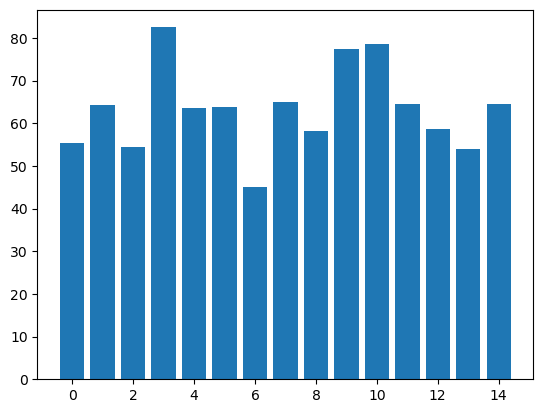

In [126]:
x_axis = np.arange(len(col))
y_axis = d1["HP"]


plt.bar(x_axis,y_axis)

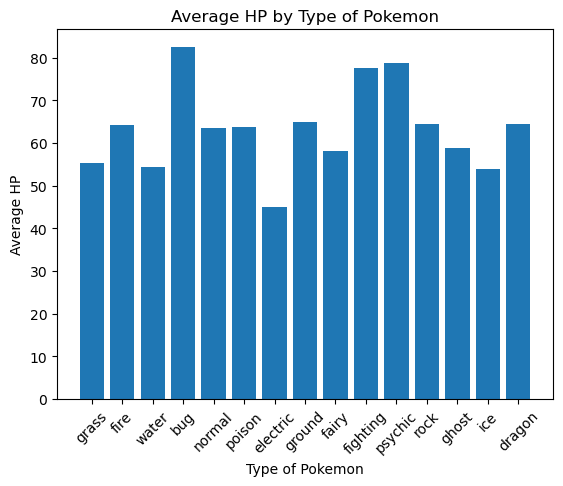

In [137]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, newt1,rotation = 45)
plt.bar(x_axis,y_axis)
plt.title("Average HP by Type of Pokemon")
plt.xlabel("Type of Pokemon")
plt.ylabel("Average HP")
plt.show()